In [43]:
from matplotlib import pyplot as plt
import numpy as np
from typing import List, Tuple

plt.rcParams['figure.figsize']  = (10, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.titlesize'] = 24

In [44]:
# See README in results/ dir for more information on the expected format of the
# result files.
#
# read_results reads all files in a results directory, and returns two lists
# containing, respectively, the times and memory results, already averaged by
# the number of simulations performed.
def read_results(
    results_dir,
    min_logs: int = 1,
    max_logs: int = 1_000_000,
    num_simuls: int = 10,
) -> Tuple[List[float], List[float]]:
    num_logs_ls = np.geomspace(min_logs, max_logs, int(np.log10(max_logs)) + 1).astype(int)

    times_agg = []
    memory_agg = []
    for num_logs in num_logs_ls:
        times = []
        memory = []
        for simul_num in range(num_simuls):
            test_result = open(f"{results_dir}/{num_logs}-{simul_num}").read()
            bynewline = test_result.split("\n")
            times.append(int(bynewline[0]))
            memory.append(int(bynewline[1]))
        times_agg.append(np.mean(times))
        memory_agg.append(np.mean(memory))
    
    return times_agg, memory_agg

In [45]:
wout_loggen_times, wout_loggen_memory = read_results("./results/wout-lushu/log-generator")
wout_pglogs_times, wout_pglogs_memory = read_results("./results/wout-lushu/pglogs")
with_loggen_times, with_loggen_memory = read_results("./results/with-lushu/log-generator")
with_pglogs_times, with_pglogs_memory = read_results("./results/with-lushu/pglogs")

In [46]:
def plot_comparison(
    lists: List[List[float]],
    labels: List[str],
    title: str = "Lushu stress test",
    scale: str = "log",
    xlabel: str = "Number of logs",
    ylabel: str = "Time (milliseconds)",
    min_logs: int = 1,
    max_logs: int = 1_000_000,
) -> None:
    plt.title(title)
    plt.xscale(scale)
    plt.yscale(scale)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    x = np.geomspace(min_logs, max_logs, int(np.log10(max_logs)) + 1).astype(int)
    for i in range(len(lists)):
        plt.plot(x, lists[i], label=labels[i])

    plt.legend()
    plt.show()

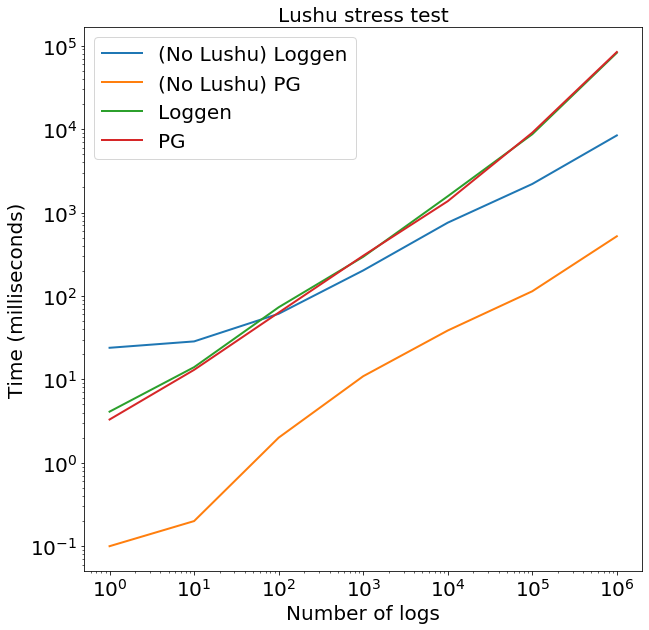

In [47]:
plot_comparison(
    [
        wout_loggen_times,
        wout_pglogs_times,
        with_loggen_times,
        with_pglogs_times,
    ],
    [
        "(No Lushu) Loggen",
        "(No Lushu) PG",
        "Loggen",
        "PG",
    ]
)

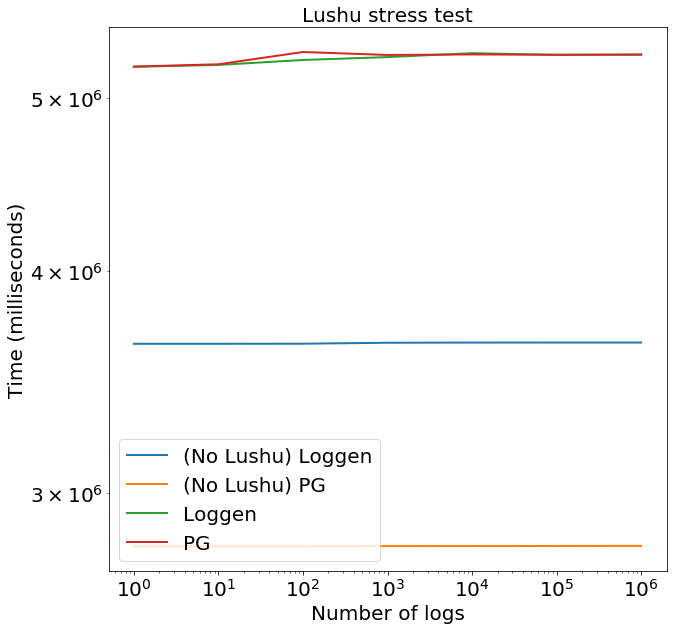

In [48]:
plot_comparison(
    [
        wout_loggen_memory,
        wout_pglogs_memory,
        with_loggen_memory,
        with_pglogs_memory,
    ],
    [
        "(No Lushu) Loggen",
        "(No Lushu) PG",
        "Loggen",
        "PG",
    ]
)